<h1><center>Used Car Price Prediction</center></h1> 

In [110]:
#Importing all the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_theme(color_codes=True)


In [111]:
#loading the data into pandas dataframe
df=pd.read_csv("train-data.csv")
import warnings
warnings.filterwarnings('ignore')

# Data Exploration and data cleaning

In [112]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [113]:
df.shape

(6019, 14)

In [114]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
New_Price        540
dtype: int64

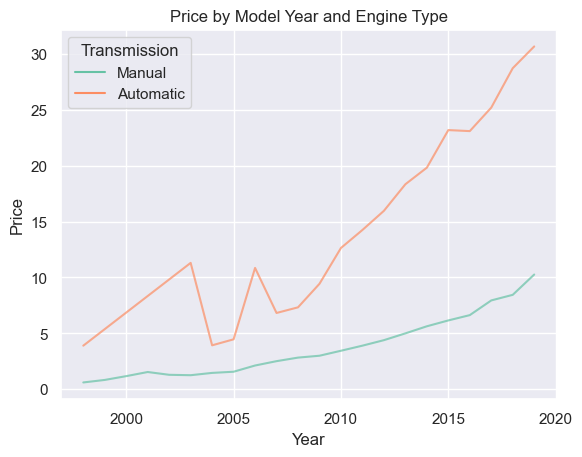

In [115]:
#Visualizing price of the car based on Engine Type and the car's Model year
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price', hue='Transmission', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Model Year and Engine Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

In [116]:
# Remove categorial column that have huge unique value
df.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
df.drop(columns=['New_Price'], inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB


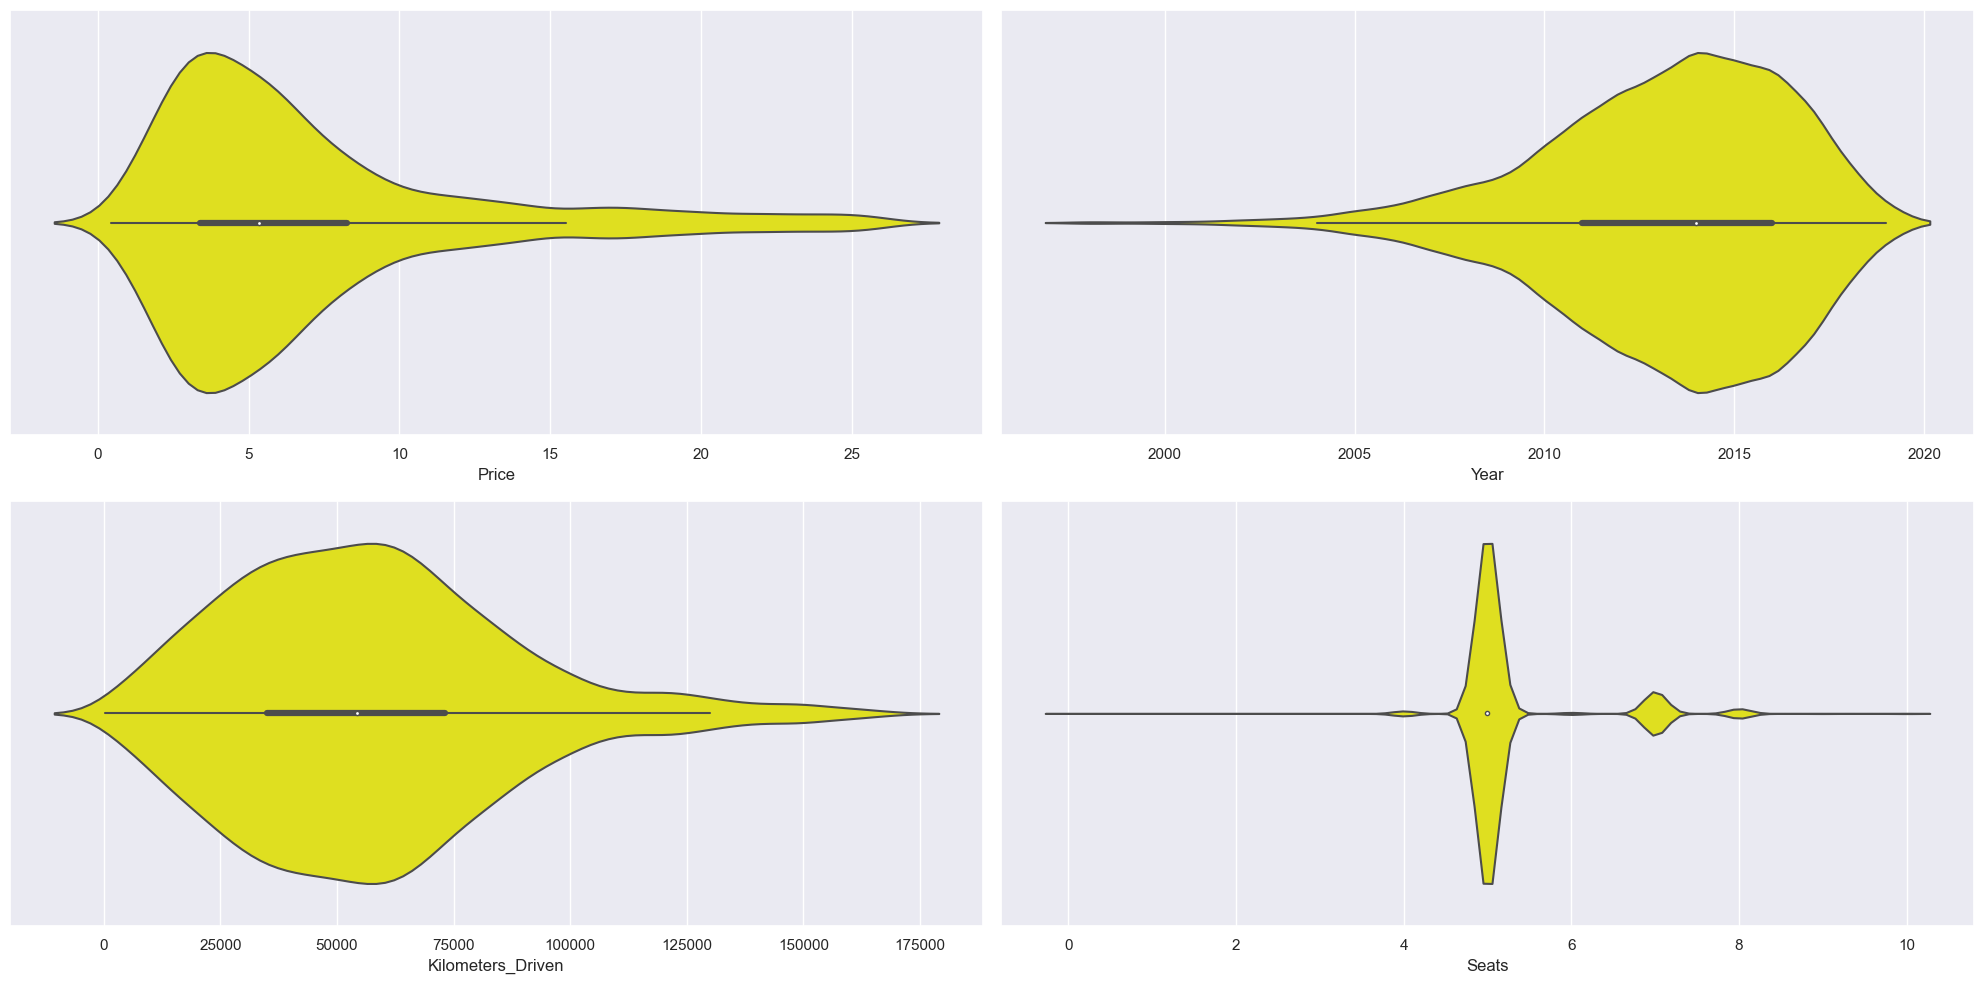

In [172]:
# Violin plot for Price, Year, Seats and Kilometers_driven
num_vars = ['Price', 'Year','Kilometers_Driven','Seats']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i], color='yellow')

fig.tight_layout()

plt.show()

In [119]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [120]:
# Remove 'cc' suffix from Engine column and then convert it into float datatype
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,17.74


In [121]:
#changing km/kg to kmpl for uniformity in the column and then converting the column to float values
df['Mileage'] = df['Mileage'].str.replace('km/kg', 'kmpl')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)

In [122]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [123]:
#Removing bhp from Power column
df['Power'] = df['Power'].str.replace('bhp', '')

In [124]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,17.74


In [125]:
df.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [126]:
# Filling null values of Seats, Engine and mileage to their mean values
df['Seats']=df['Seats'].fillna(df['Seats'].mean())
df['Engine']=df['Engine'].fillna(df['Engine'].mean())
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())

In [127]:
#Removing extra space from Power column
df['Power'] = df['Power'].str.replace(' ', '')

In [128]:
#Checking how many records are null in Power column
df['Power'].isnull().values.sum()
#df.Power.unique()

36

In [129]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')
df['Power']=df['Power'].fillna(df['Power'].mean())

In [130]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


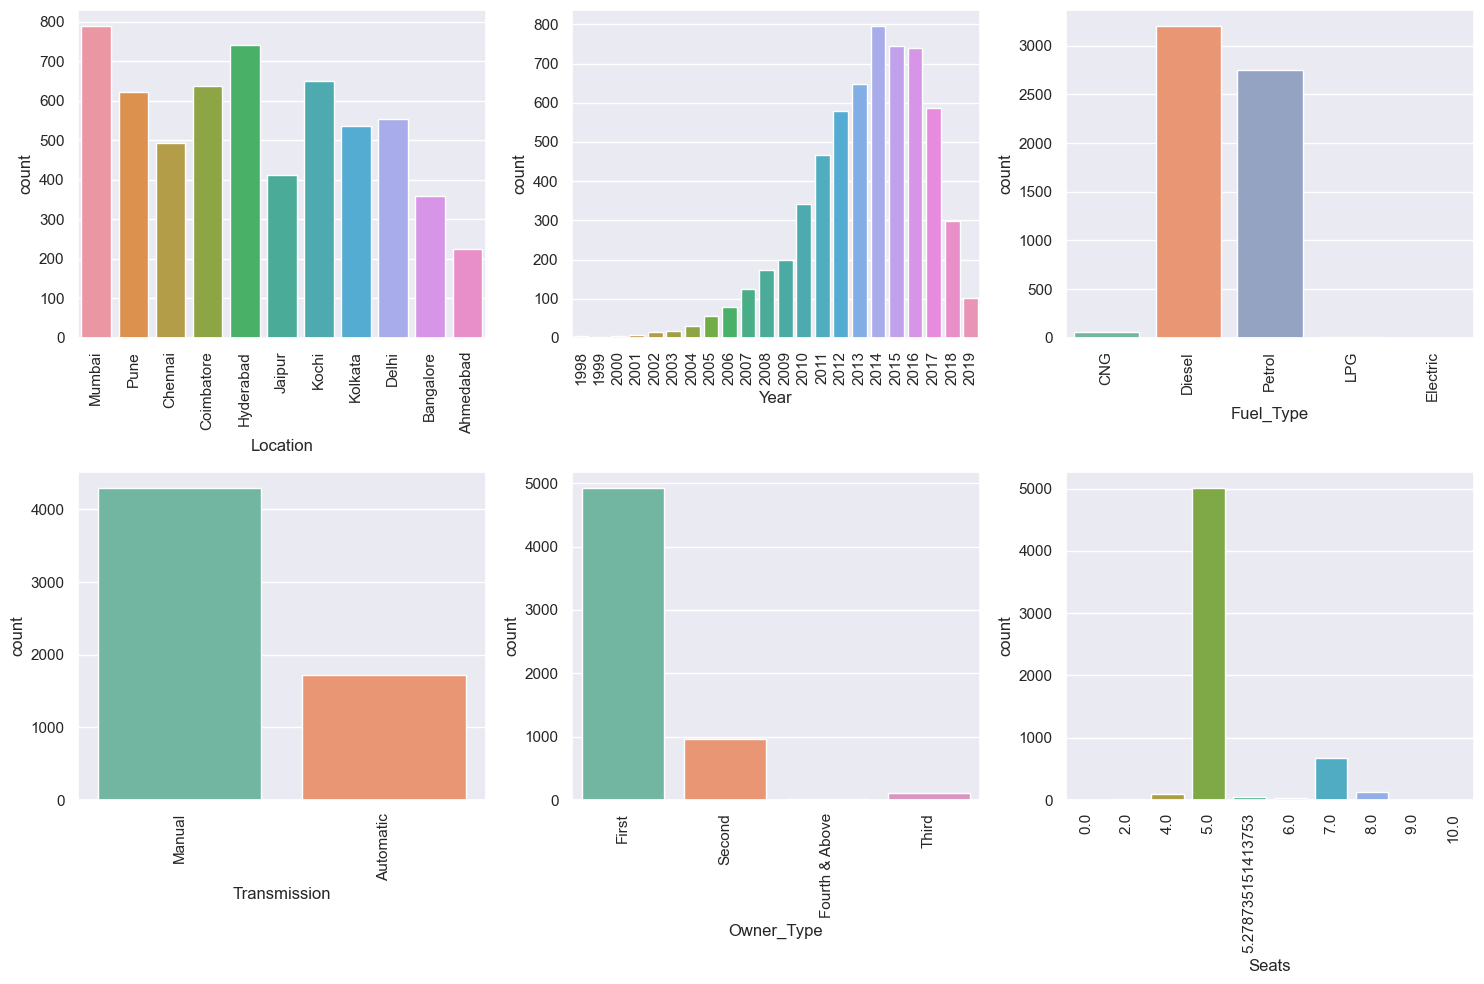

In [131]:
# list of categorical variables to plot
cat_vars = [
'Location','Year','Fuel_Type','Transmission','Owner_Type','Seats']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [132]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Kilometers_Driven, Engine, Power and Price columns have outliers. So we will remove outliers using IQR method.

In [133]:
df.select_dtypes('object').describe()

,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019
unique,11,5,2,4
top,Mumbai,Diesel,Manual,First
freq,790,3205,4299,4929


# Removing Outliers

In [134]:
# Removing outliers using IQR outlier removal 
for col in ['Kilometers_Driven','Mileage', 'Kilometers_Driven','Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df = df[(df[col] >= Q1-2.5*IQR) & (df[col] <= Q3+2.5*IQR)]
    

In [135]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [136]:
# Define the function to segment the cities
def segment_city(city):
    if city in ['Mumbai','Pune','Ahmedabad']:
        return 'West_City'
    elif city in ['Chennai', 'Coimbatore', 'Hyderabad','Kochi','Bangalore']:
        return 'South_City'
    elif city in ['Jaipur','Delhi']:
        return 'North_City'
    elif city in ['Kolkata']:
        return 'East_City'
    else:
        return city
df['Location1'] = df['Location'].apply(segment_city)


In [137]:
df.sample()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location1
2568,Hyderabad,2011,166000,Diesel,Manual,First,12.99,2494.0,100.6,8.0,8.25,South_City


<AxesSubplot:>

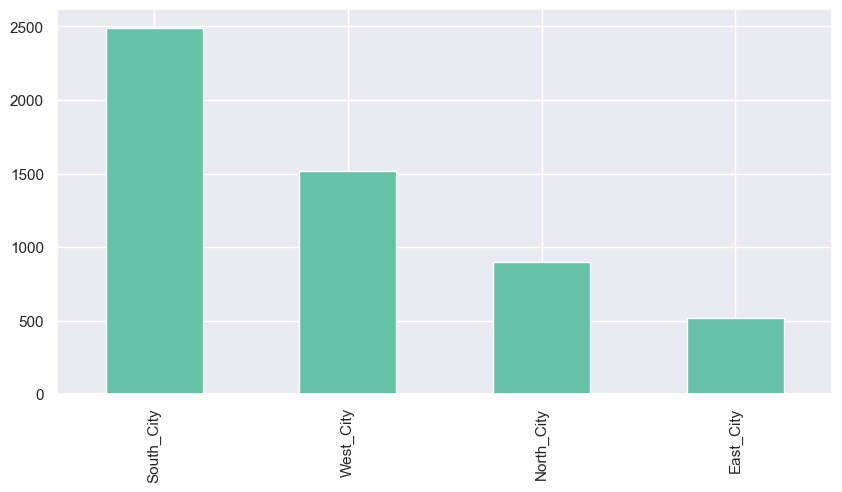

In [138]:
#Plotting a bar diagram for showing different location with number of cars.
df.drop(columns='Location', inplace=True)
plt.figure(figsize=(10,5))
df['Location1'].value_counts().plot(kind='bar')
#plt.ylabel("Paurchased Cars")


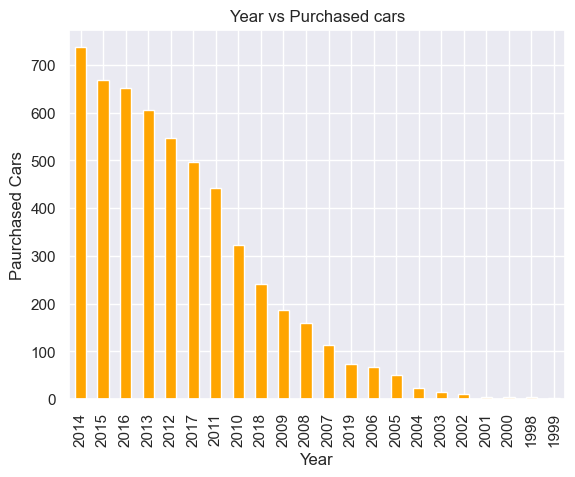

In [169]:
#Number of purchased car over the year
purchased_car_per_year = df['Year'].value_counts()
purchased_car_per_year.plot(kind='bar', color='orange')
plt.xlabel("Year")
plt.ylabel("Paurchased Cars")
plt.title("Year vs Purchased cars")
plt.show()

In [140]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Location1
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,West_City
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,West_City
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,South_City
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,South_City
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,South_City


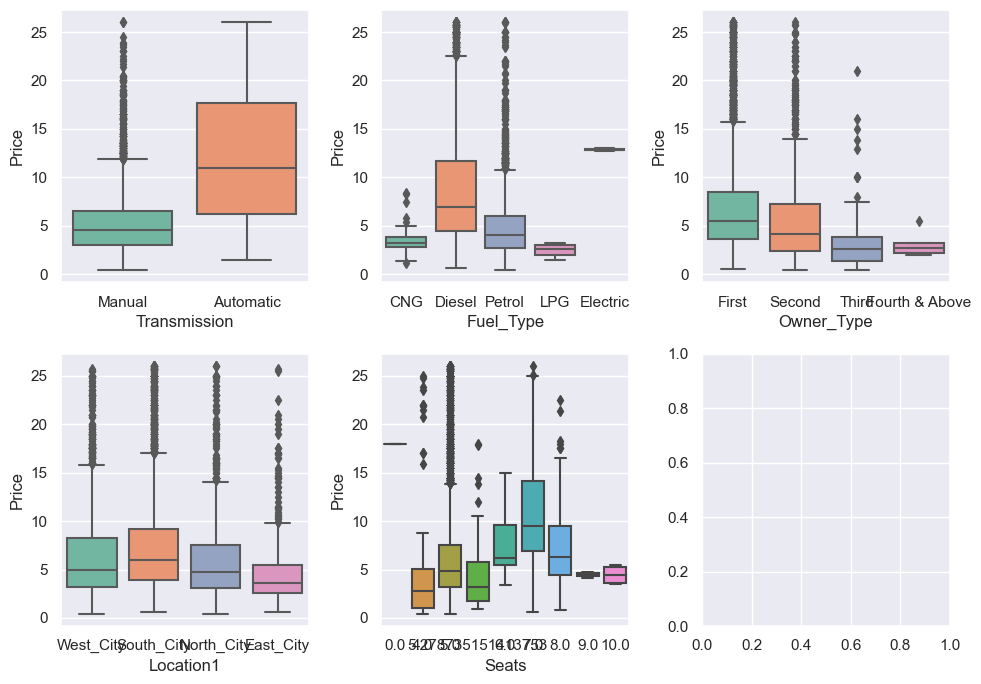

In [141]:
# Plotting boxplot for columns data distribution
num_vars = ['Transmission', 'Fuel_Type','Owner_Type','Location1','Seats']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y= df.Price, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

# One Hot Encoding

In [142]:
#Converting the text values of columns into separate columns with numeric values like 0 and 1
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Location1_North_City,Location1_South_City,Location1_West_City
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,0,1,0,0,0,0,0,1
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,0,0,1,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,1,0,0,0,0,1,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,0,0,1,0,0,0,0,1,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,0,0,0,1,0,0,1,0


In [143]:
df.shape

(5432, 18)

In [144]:
# Assigning input and target variables to X and y
X = df.drop('Price', axis='columns')
y = df.Price

# Scaling

In [145]:
# Scaling the input variable X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=30)

# ML Linear Regression and KFold cross validation

In [147]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7567381683319528

In [148]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.72741522, 0.69709042, 0.75649699, 0.75284005, 0.74620928])

<AxesSubplot:>

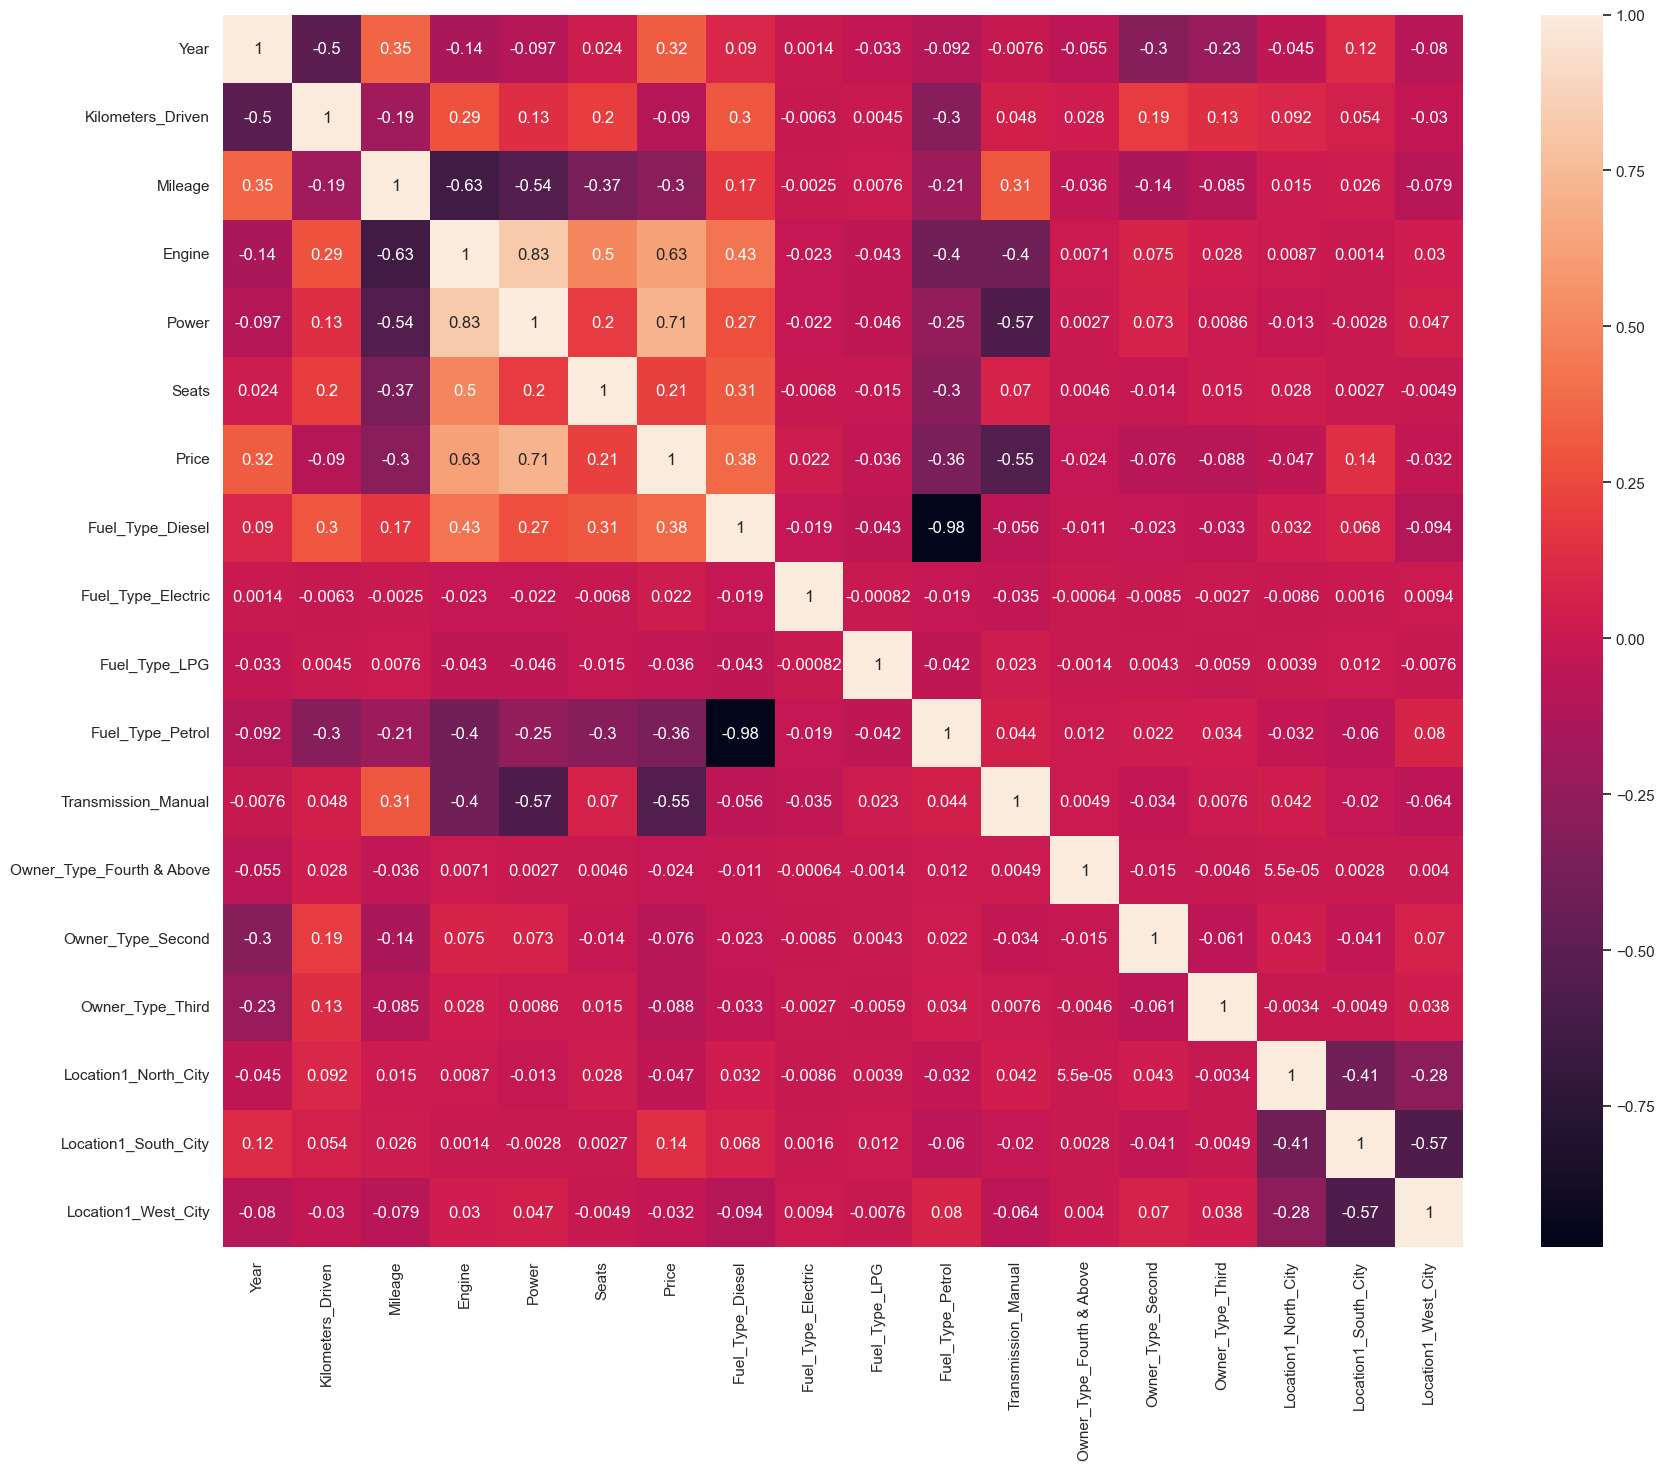

In [149]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

<b> Hyperparameter tuning using GridSearchCV and DecisionTreeRegressor

<b>KNN model

In [153]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.826568843449319

In [160]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'KNeighborsRegressor' : {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [2,3,5,10]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random'],
                'max_depth': [2,5,10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, y)


,model,best_score,best_params
0,KNeighborsRegressor,0.451521,{'n_neighbors': 5}
1,lasso,0.676985,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.840351,"{'criterion': 'mse', 'max_depth': 10, 'splitte..."


Based on above results we can say that decion_tree gives the best score. Hence we will use that.

In [165]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=10, criterion='mse', splitter='best')
dtree.fit(X_train, y_train)
dtree.score(X_test,y_test)

0.8508515137703799

In [173]:
dtree.score(X_train,y_train)

0.9572226673495758

<b> Evaluating the importance of each variables for price prediction

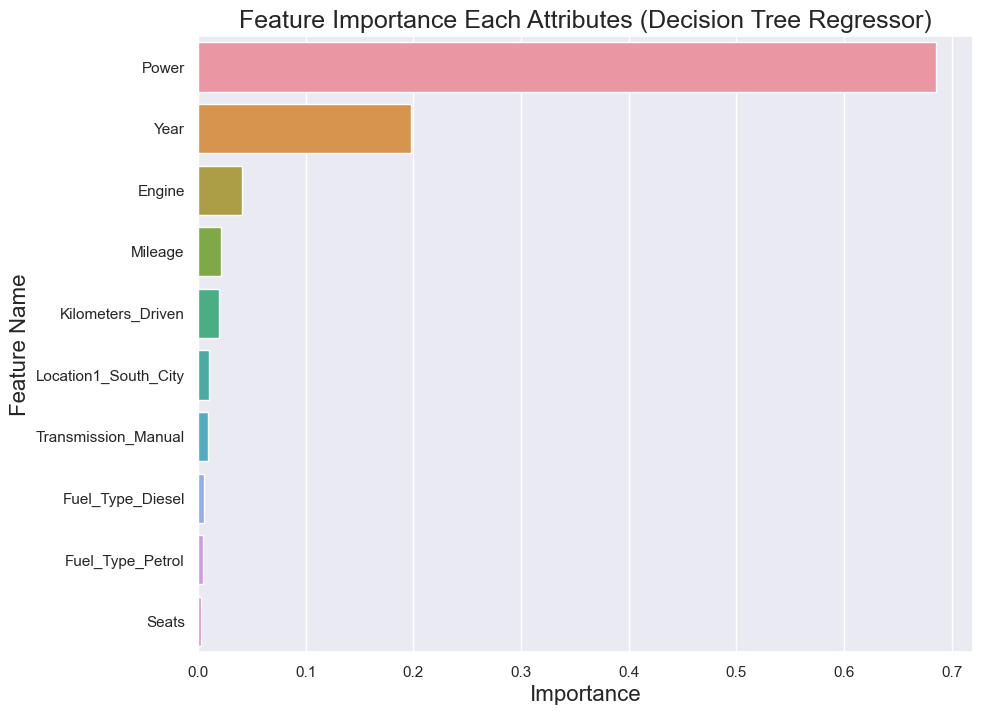

In [347]:
imp_df = pd.DataFrame({
    "Feature Name": X.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()